# Predicting Income in Adult Census Data: A Comparative Analysis

### Kan May Yoke Michelle, G2203916B
### IN6227-2023-Assignment-1.2

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
cols=['age', 'workclass', 'final_weight', 'educatn', 'educatn_lvl', 'marital_status', 'occupatn', 'relationship',
             'race','gender','capital_gain','capital_loss','hour_per_week','country','income']
df_train = pd.read_csv('Data/adult.data.csv', names=cols,na_values=' ?',  header=None )
df_test = pd.read_csv('Data/adult.test.csv', names=cols,na_values=' ?',  header=None )
df_test['income'] = df_test['income'].str.replace('.', '', regex=True)

### Descriptive Analysis

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   final_weight    32561 non-null  int64 
 3   educatn         32561 non-null  object
 4   educatn_lvl     32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupatn        30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hour_per_week   32561 non-null  int64 
 13  country         31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       15318 non-null  object
 2   final_weight    16281 non-null  int64 
 3   educatn         16281 non-null  object
 4   educatn_lvl     16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupatn        15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   gender          16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hour_per_week   16281 non-null  int64 
 13  country         16007 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [ ]:
print(df_train.shape)
df_train.head()

(32561, 15)


,age,workclass,final_weight,educatn,educatn_lvl,marital_status,occupatn,relationship,race,gender,capital_gain,capital_loss,hour_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
print(df_test.shape)
df_test.head()

(16281, 15)


,age,workclass,final_weight,educatn,educatn_lvl,marital_status,occupatn,relationship,race,gender,capital_gain,capital_loss,hour_per_week,country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   final_weight    32561 non-null  int64 
 3   educatn         32561 non-null  object
 4   educatn_lvl     32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupatn        30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hour_per_week   32561 non-null  int64 
 13  country         31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
final_weight,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
educatn_lvl,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hour_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
# Distribution of class label in training set
print(df_train['income'].value_counts())
print()
income_counts = df_train['income'].value_counts()

total_entries = len(df_train)
percent_greater_50k = (income_counts[0]/total_entries) * 100
percent_lesser_50k = (income_counts[1]/total_entries) * 100

print(f"<=50K: {percent_greater_50k:.2f}%")
print(f">50K: {percent_lesser_50k:.2f}%")

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

<=50K: 75.92%
>50K: 24.08%


In [ ]:
# Distribution of class label in testing set
print(df_test['income'].value_counts())
print()
income_counts = df_test['income'].value_counts()

total_entries = len(df_test)
percent_greater_50k = (income_counts[0]/total_entries) * 100
percent_lesser_50k = (income_counts[1]/total_entries) * 100

print(f"<=50K: {percent_greater_50k:.2f}%")
print(f">50K: {percent_lesser_50k:.2f}%")

 <=50K    12435
 >50K      3846
Name: income, dtype: int64

<=50K: 76.38%
>50K: 23.62%


# EDA

### Continuous attributes

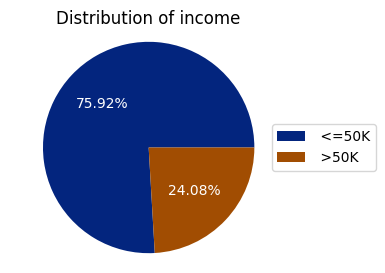

In [ ]:
# Count the number of entries for income category
count_income = df_train['income'].value_counts()

plt.figure(figsize=(3, 3))
plt.title("Distribution of income")
plt.pie(count_income, labels=count_income.index, autopct='%1.2f%%', colors=['#03257E', '#A14D02'],  textprops={'color': 'white'})
plt.axis('equal')
plt.legend(labels=count_income.index, loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

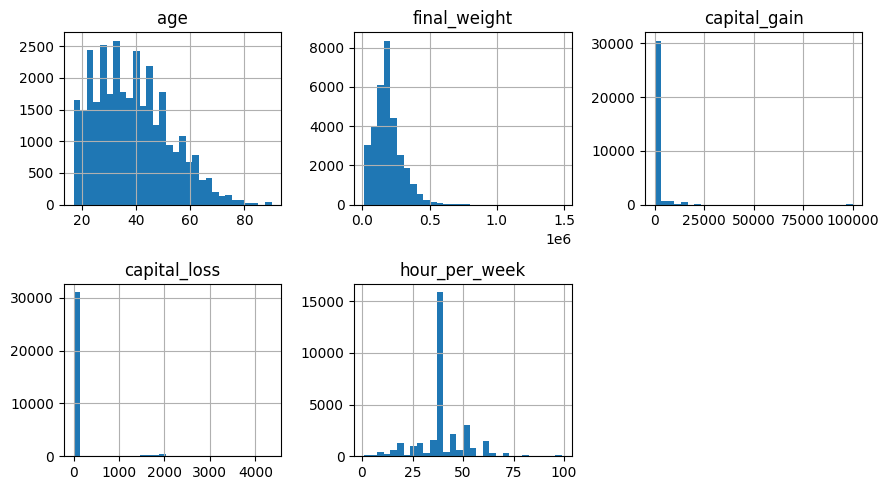

In [ ]:
continuous_cols = ['age', 'final_weight','capital_gain', 'capital_loss', 'hour_per_week']
df_train[continuous_cols].hist(bins=30, figsize=(9, 5) , layout=(2, 3)  )
plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

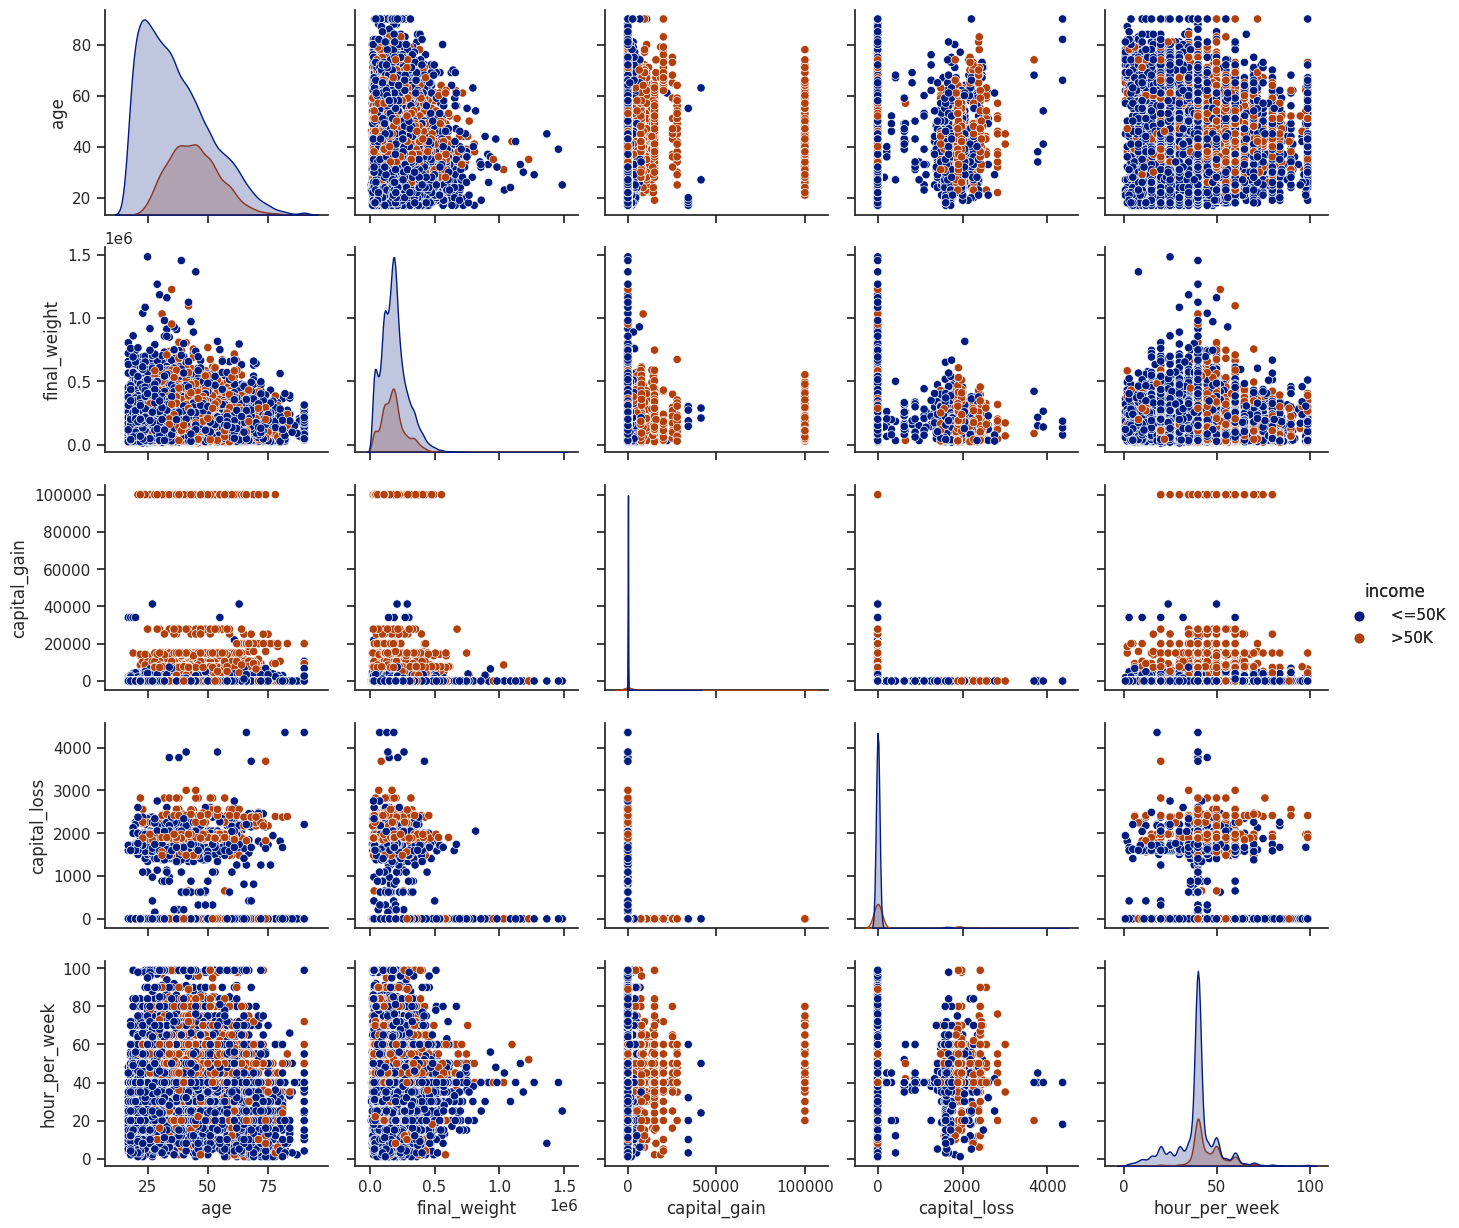

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
continuous_cols = ['age', 'final_weight','capital_gain', 'capital_loss', 'hour_per_week']
sns.set(style="ticks")
pairplot = sns.pairplot(df_train, hue='income', vars=continuous_cols, palette='dark')
sns.set_theme(style="darkgrid")
pairplot.add_legend()
plt.show()


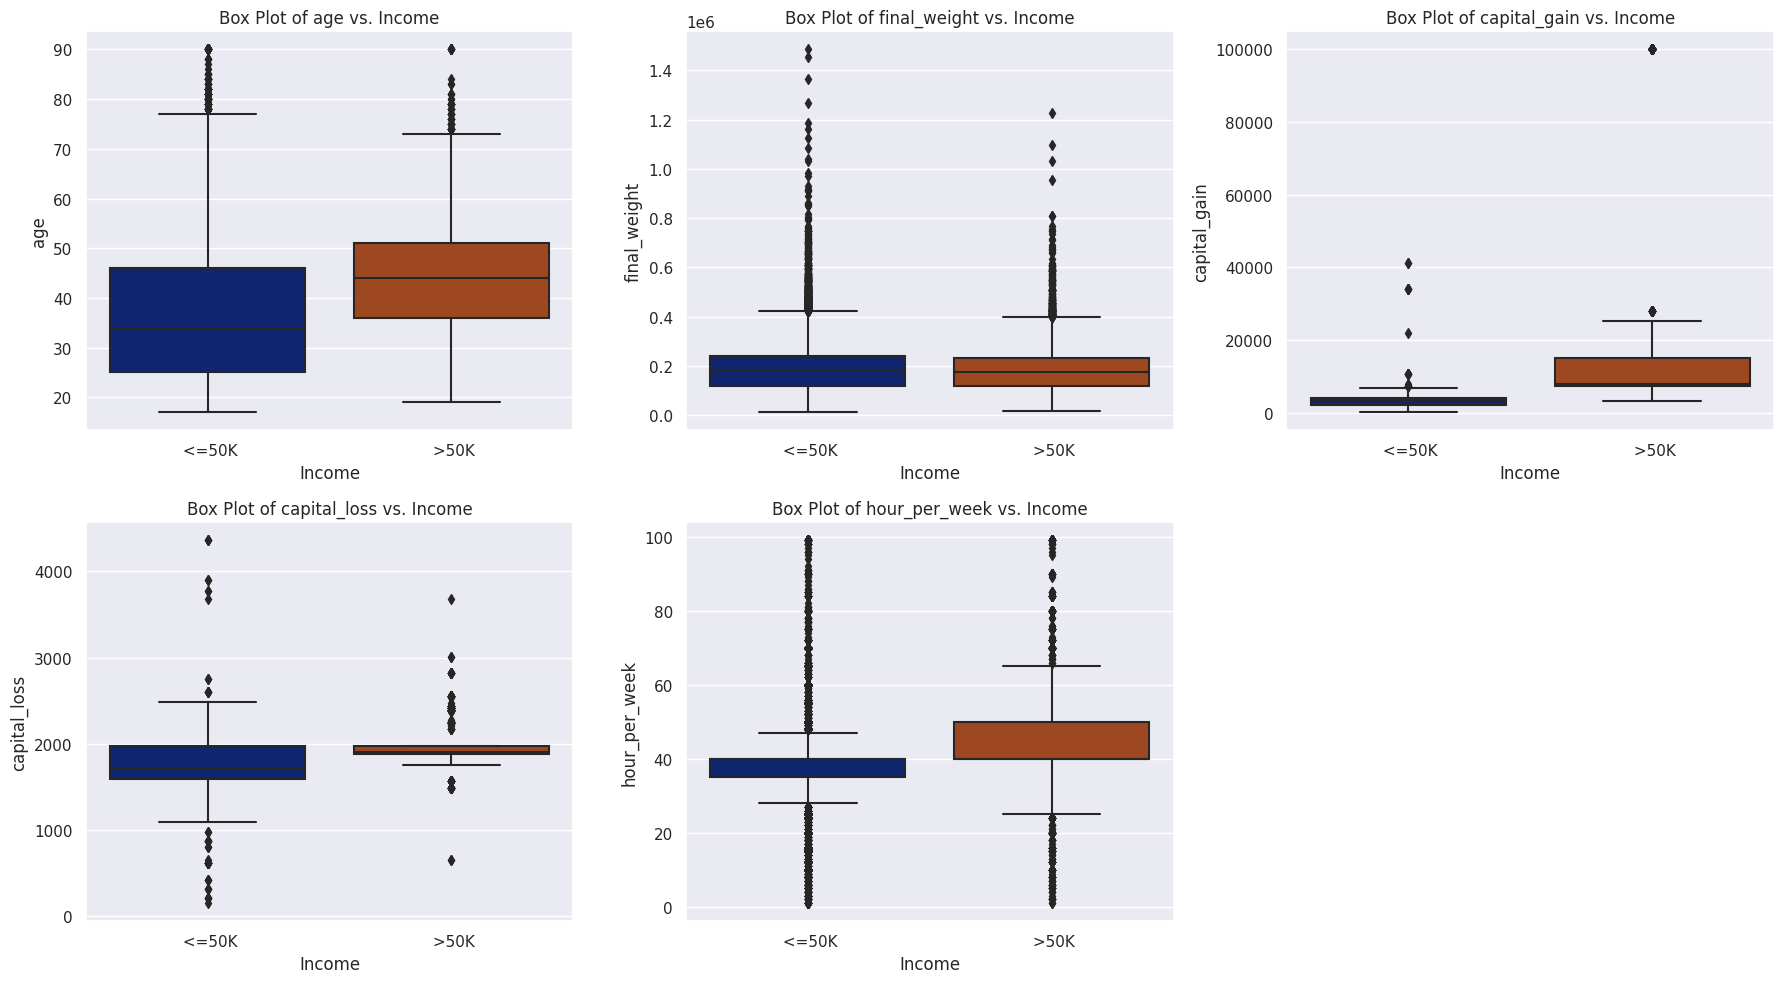

In [ ]:
continuous_cols = ['age', 'final_weight','capital_gain', 'capital_loss', 'hour_per_week']

plt.figure(figsize=(18, 10))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(2, 3, i)
    if col in ['capital_gain', 'capital_loss']:
        # Exclude rows where capital_gain or capital_loss are zero
        data_to_plot = df_train[df_train[col] != 0]
        sns.boxplot(data=data_to_plot, x='income', y=col, palette='dark')
    else:
        sns.boxplot(data=df_train, x='income', y=col, palette='dark')
    sns.set_theme(style="darkgrid")
    plt.xlabel('Income')
    plt.ylabel(col)
    plt.title(f'Box Plot of {col} vs. Income')

plt.tight_layout()
plt.show()


### Nominal & Interval attributes



Categorical Features Analysis for Income



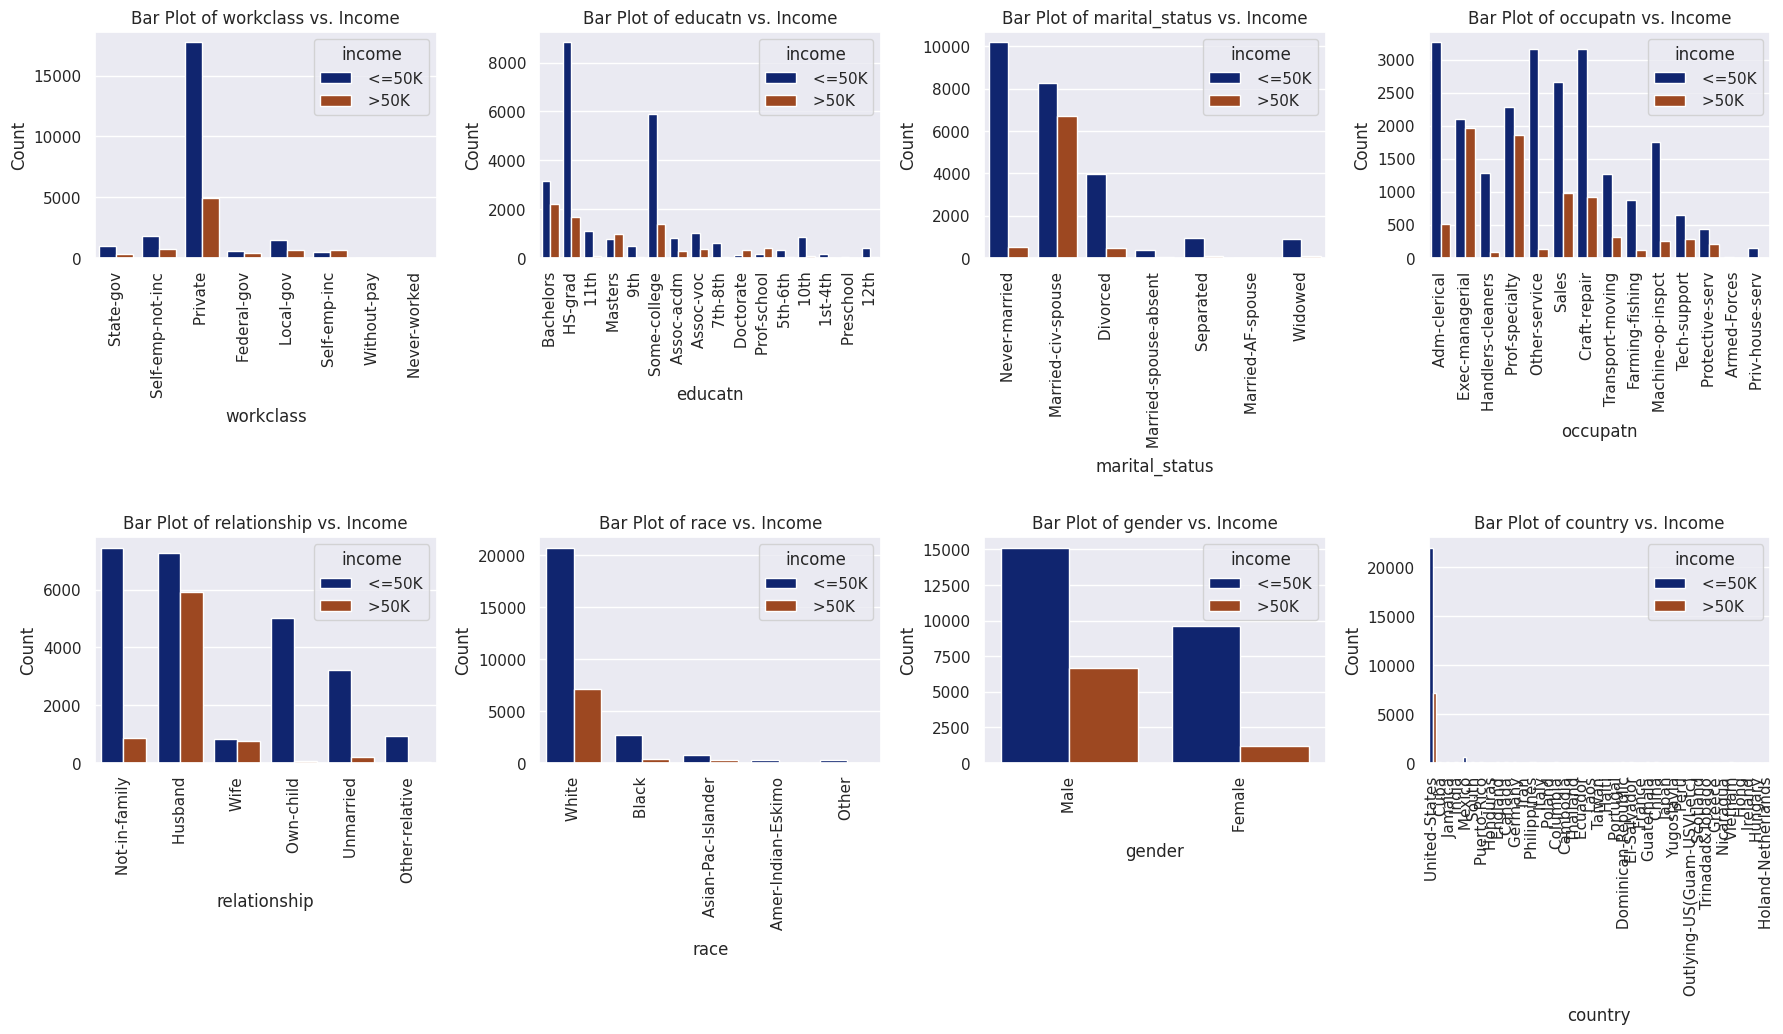

In [ ]:
print(f'Categorical Features Analysis for Income\n')
categorical_cols = ['workclass', 'educatn', 'marital_status', 'occupatn', 'relationship', 'race', 'gender', 'country']

plt.figure(figsize=(18, 18))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df_train, x=col, hue='income', palette='dark')
    sns.set_theme(style="darkgrid")

    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Bar Plot of {col} vs. Income')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Correlation

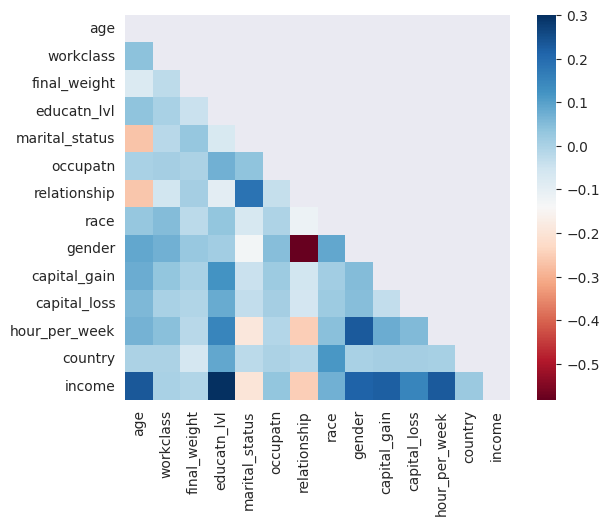

In [ ]:
corr = df_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     cmap='RdBu')
sns.set_theme(style="darkgrid")
plt.show()

# Data Pre-processing

#### Drop Redundant Attributes

In [ ]:
# Drop education attribute since it is the same as educatn_lvl
df_train=df_train.drop(columns=['educatn'])
df_test=df_test.drop(columns=['educatn'])

df_train.head(5)

,age,workclass,final_weight,educatn_lvl,marital_status,occupatn,relationship,race,gender,capital_gain,capital_loss,hour_per_week,country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Manage Null Values

In [ ]:
null_values = df_train.isnull()
null_values.sum()

age                  0
workclass         1836
final_weight         0
educatn_lvl          0
marital_status       0
occupatn          1843
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hour_per_week        0
country            583
income               0
dtype: int64

In [ ]:
null_count = df_train.isnull().sum()
null_percent = (null_count / len(df_train)) * 100
print("Missing Values in Each Column:")
for col in df_train.columns:
    print(f"{col}: {null_count[col]} missing ({null_percent[col]:.2f}%)")

Missing Values in Each Column:
age: 0 missing (0.00%)
workclass: 1836 missing (5.64%)
final_weight: 0 missing (0.00%)
educatn_lvl: 0 missing (0.00%)
marital_status: 0 missing (0.00%)
occupatn: 1843 missing (5.66%)
relationship: 0 missing (0.00%)
race: 0 missing (0.00%)
gender: 0 missing (0.00%)
capital_gain: 0 missing (0.00%)
capital_loss: 0 missing (0.00%)
hour_per_week: 0 missing (0.00%)
country: 583 missing (1.79%)
income: 0 missing (0.00%)


In [ ]:
# replacing null values in Country columns with most frequent value
mode_value = df_train['workclass'].mode().iloc[0]
df_train['workclass'].fillna(mode_value, inplace=True)
mode_value = df_train['occupatn'].mode().iloc[0]
df_train['occupatn'].fillna(mode_value, inplace=True)
mode_value = df_train['country'].mode().iloc[0]
df_train['country'].fillna(mode_value, inplace=True)

#### Identifying and removing duplicates

In [ ]:
df_train.duplicated().sum()

24

In [ ]:
df_train = df_train.drop_duplicates()

### Encoding

In [ ]:
# Convert categorical variables to numeric variables
label_encoder = LabelEncoder()

categorical_columns = ['income','workclass','educatn_lvl','marital_status','occupatn','relationship','race','gender','country']

df_train[categorical_columns] = df_train[categorical_columns].apply(label_encoder.fit_transform)
df_test[categorical_columns] = df_test[categorical_columns].apply(label_encoder.fit_transform)

In [ ]:
y_train = df_train['income']
x_train = df_train.drop(columns=['income'])
y_test = df_test['income']
x_test = df_test.drop(columns=['income'])

# Training the model

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
import time

#### Training & Parameter Tuning

In [ ]:
# Determine optimal depth to stop splitting the tree using stratified 5-fold cross_validation

depths = list(range(1, 50))
accuracy_means = []

start_time = time.time()
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)

    # Perform 5-fold cross-validation and store the accuracy scores
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')

    accuracy_mean = np.mean(scores)
    accuracy_means.append(accuracy_mean)

end_time = time.time()

print("Time taken to find the optimal depth using cross-validation:", end_time - start_time)

# Find the depth with the highest mean accuracy
best_depth = depths[np.argmax(accuracy_means)]
best_accuracy = max(accuracy_means)

print("Optimal depth:", best_depth)
print("Associated accuracy:", round(best_accuracy,4))

Time taken to find the optimal depth using cross-validation: 32.93834090232849
Optimal depth: 8
Associated accuracy: 0.8549


In [ ]:
# Determine optimal splits to stop splitting the tree using stratified 5-fold cross_validation

splits = list(range(2, 50))
accuracy_means = []

start_time = time.time()
for split in splits:
    clf = DecisionTreeClassifier(max_depth=7, min_samples_split=split)

    # Perform 5-fold cross-validation and store the accuracy scores
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')

    accuracy_mean = np.mean(scores)
    accuracy_means.append(accuracy_mean)

end_time = time.time()

print("Time taken to find the optimal depth using cross-validation:", end_time - start_time)

# Find the depth with the highest mean accuracy
best_split = splits[np.argmax(accuracy_means)]
best_accuracy = max(accuracy_means)

print("Optimal split:", best_split)
print("Associated accuracy:", round(best_accuracy,4))

Time taken to find the optimal depth using cross-validation: 14.941800832748413
Optimal split: 21
Associated accuracy: 0.8538


In [ ]:
# Determine optimal number of leaf to stop splitting the tree using stratified 5-fold cross_validation

leaves = list(range(2, 50))

# Initialize lists to store results
accuracy_means = []

start_time = time.time()
for leaf in leaves:
    clf = DecisionTreeClassifier(max_depth=7, min_samples_split=20, min_samples_leaf=leaf)

    # Perform 5-fold cross-validation and store the accuracy scores
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')

    accuracy_mean = np.mean(scores)
    accuracy_means.append(accuracy_mean)

end_time = time.time()

print("Time taken to find the optimal depth using cross-validation:", end_time - start_time)

best_leaf_num = leaves[np.argmax(accuracy_means)]
best_accuracy = max(accuracy_means)

print("Optimal leaf:", best_leaf_num)
print("Associated accuracy:", round(best_accuracy,4))

Time taken to find the optimal depth using cross-validation: 16.063798904418945
Optimal leaf: 16
Associated accuracy: 0.8545


### Testing the Model

#### Using Entropy

In [ ]:
# Testing the decision tree classification model using entropy
train_start=time.time()
clf_en1 = DecisionTreeClassifier(criterion="entropy",max_depth=8,min_samples_split = 21, min_samples_leaf=16)
clf_en1 = clf_en1.fit(x_train,y_train)
train_end=time.time()

test_start= time.time()
y_pred_en= clf_en1.predict(x_test)
test_end= time.time()

accuracy_en = metrics.accuracy_score(y_test, y_pred_en)
conf_matrix_en1 = confusion_matrix(y_test,y_pred_en)
print("Time taken for training", train_end - train_start)
print("Time taken for testing", test_end - test_start)
print("Accuracy:",accuracy_en)
print(conf_matrix_en1)
print(classification_report(y_test,y_pred_en))

Time taken for training 0.1221170425415039
Time taken for testing 0.004540920257568359
Accuracy: 0.8561513420551563
[[11910   525]
 [ 1817  2029]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     12435
           1       0.79      0.53      0.63      3846

    accuracy                           0.86     16281
   macro avg       0.83      0.74      0.77     16281
weighted avg       0.85      0.86      0.85     16281



#### Using Gini index

In [ ]:
# Testing the decision tree classification model using gini

train_start=time.time()
clf_gn1 = DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_split = 21, min_samples_leaf=16)
clf_gn1 = clf_gn1.fit(x_train,y_train)
train_end=time.time()

test_start=time.time()
y_pred_gn = clf_gn1.predict(x_test)
test_end = time.time()

accuracy_gn = metrics.accuracy_score(y_test, y_pred_gn)
conf_matrix_gn1 = confusion_matrix(y_test,y_pred_gn)

print("Time taken for model training", train_end - train_start)
print("Time taken for model testing", test_end - test_start)
print("Accuracy:",accuracy_gn)
print(conf_matrix_gn1)
print(classification_report(y_test,y_pred_gn))

Time taken for model training 0.1037299633026123
Time taken for model testing 0.004078388214111328
Accuracy: 0.8540630182421227
[[11811   624]
 [ 1752  2094]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12435
           1       0.77      0.54      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.82      0.75      0.77     16281
weighted avg       0.85      0.85      0.84     16281



##### Cost of Classification

In [ ]:
# Computing Cost of Classification based on model using entropy
import numpy as np

cost_minority = 1.3  # Cost of misclassifying <= 50K
cost_majority = 1  # Cost of misclassifying > 50k

cost_matrix = np.array([[0, cost_majority], [cost_minority, 0]])

# Calculate the cost
total_cost1 = np.sum(conf_matrix_en1 * cost_matrix)
total_cost2 = np.sum(conf_matrix_gn1 * cost_matrix)
print("Total Cost (entropy):", total_cost1)
print("Total Cost (gini):", total_cost2)

Total Cost (entropy): 2887.1
Total Cost (gini): 2901.6


Confidence interval for accuracy

In [ ]:
# Compute confidence interval for the accuracy
import scipy.stats

confidence=0.95
z_value=scipy.stats.norm.ppf((1+confidence)/2.0)
accuracy=max(accuracy_en,accuracy_gn)
ci_length = z_value*np.sqrt((accuracy*(1-accuracy))/y_test.shape[0])
ci_lower = accuracy-ci_length
ci_upper = accuracy+ci_length

print(ci_lower, ci_upper)

0.850760759134233 0.8615419249760796


## K Nearest Neighbour Classifer

#### Training & Parameter Tuning

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_knn = scaler.fit_transform(x_train)
x_test_knn = scaler.transform(x_test)


Time taken to find optimal k is 139.83462166786194
The optimal k value is 15


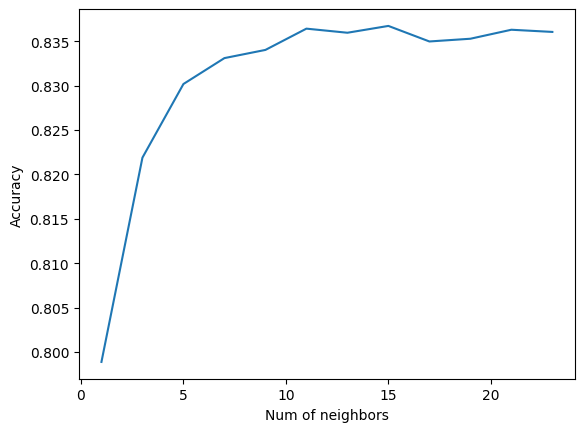

In [ ]:
# K Nearest Neighbour classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import time

# Determine the optimal k value
start_time=time.time()
k_values=range(1,25,2)
k_scores=[]
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    cv_scores=cross_val_score(knn, x_train_knn, y_train, cv=5, scoring='accuracy')
    k_scores.append(cv_scores.mean())
end_time=time.time()

optimal=k_values[k_scores.index(max(k_scores))]
print(f"Time taken to find optimal k is {end_time-start_time}")
print(f'The optimal k value is {optimal}')

plt.plot(k_values, k_scores)
plt.xlabel('Num of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':list(range(1,31))}
grid_model=GridSearchCV(knn,param_grid=param_grid,cv=5,scoring='accuracy')
grid_model.fit(x_train_knn,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1, n_neighbors=23),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [ ]:
grid_model.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 15,
 'p': 2,
 'weights': 'uniform'}

### Testing the Model

In [ ]:
# Test the nearest-neighbor classification using mahattan distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import time

train_start=time.time()
knn_man=KNeighborsClassifier(n_neighbors=15,metric='manhattan', weights='distance')
knn_man=knn_man.fit(x_train_knn,y_train)
train_end=time.time()

test_start=time.time()
y_pred_knn_man=knn_man.predict(x_test_knn)
test_end=time.time()

accuracy_man=metrics.accuracy_score(y_test, y_pred_knn_man)
conf_matrix_man=confusion_matrix(y_test,y_pred_knn_man)
print("Time taken for model training", train_end - train_start)
print("Time taken for model testing", test_end - test_start)
print("Accuracy:",accuracy_man)
print(conf_matrix_man)
print(classification_report(y_test,y_pred_knn_man))

Time taken for model training 0.1085972785949707
Time taken for model testing 17.14142370223999
Accuracy: 0.8407960199004975
[[11486   949]
 [ 1643  2203]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.70      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.76     16281
weighted avg       0.83      0.84      0.84     16281



In [ ]:
# Test the nearest-neighbor classification using euclidean distance

train_start=time.time()
knn_eu=KNeighborsClassifier(n_neighbors=15,metric='euclidean', weights='distance')
knn_eu=knn_eu.fit(x_train_knn,y_train)
train_end=time.time()

test_start = time.time()
y_pred_knn_eu = knn_eu.predict(x_test_knn)
test_end = time.time()

accuracy_eu = metrics.accuracy_score(y_test, y_pred_knn_eu)
conf_matrix_eu = confusion_matrix(y_test,y_pred_knn_eu)

print("Time taken for model training", train_end - train_start)
print("Time taken for model testing", test_end - test_start)
print("Accuracy:",accuracy_eu)
print(conf_matrix_eu)
print(classification_report(y_test,y_pred_knn_eu))

Time taken for model training 0.08932852745056152
Time taken for model testing 10.821520805358887
Accuracy: 0.8368036361402862
[[11423  1012]
 [ 1645  2201]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.69      0.57      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.75      0.76     16281
weighted avg       0.83      0.84      0.83     16281



In [ ]:
# Computing Cost of Classification based on model
import numpy as np

cost_minority = 1.3  # Cost of misclassifying <= 50K
cost_majority = 1  # Cost of misclassifying > 50k

cost_matrix = np.array([[0, cost_majority], [cost_minority, 0]])

# Calculate the cost
total_cost1 = np.sum(conf_matrix_man * cost_matrix)
total_cost2 = np.sum(conf_matrix_eu * cost_matrix)
print("Total Cost (manhattan):", total_cost1)
print("Total Cost (euclidean):", total_cost2)

Total Cost (manhattan): 3084.9
Total Cost (euclidean): 3150.5


In [ ]:
# Compute confidence interval for the accuracy
import scipy.stats

confidence=0.95
z_value=scipy.stats.norm.ppf((1 + confidence)/2.0)
max_accuracy=max(accuracy_man,accuracy_eu)
ci_length=z_value * np.sqrt((max_accuracy*(1 - max_accuracy))/y_test.shape[0])
ci_lower=max_accuracy - ci_length
ci_upper=max_accuracy + ci_length

print(ci_lower, ci_upper)

0.8351761037370536 0.8464159360639413


## Comparing Between Models

In [ ]:
n1 = len(df_test)
n2 = len(df_test)
e1 = (conf_matrix_gn1[0, 1] + conf_matrix_gn1[1, 0])/n1  # decision tree based on gini as the measurement of impurity
e2 = (conf_matrix_man[0, 1] + conf_matrix_man[1, 0])/n2  # k nearest neighbour based on Manhattan distance

print(e1, e2)

0.14593698175787728 0.15920398009950248


In [ ]:
# Compare the performance of 2 models
import scipy.stats
import numpy as np

n1 = 16281
n2 = 16281
e1 = (conf_matrix_gn1[0, 1] + conf_matrix_gn1[1, 0])/n1
e2 = (conf_matrix_man[0, 1] + conf_matrix_man[1, 0])/n2

d= abs(e1 - e2)

sigma_2=((e1 * (1-e1)) / n1) + ((e2 * (1-e2)) / n2)
conf = 0.95
z_value = scipy.stats.norm.ppf((1 + conf)/2.0)
conf_interval_length= z_value * np.sqrt(sigma_2)
conf_interval_lower= d - ci_length
conf_interval_upper= d + ci_length

print(conf_interval_lower, conf_interval_upper)

0.007647082178181429 0.018886914505068977
